<a href="https://colab.research.google.com/github/daniilwithangelic/laba-in-car-obychen/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_6_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 6. Обучение без учителя

## **Цель занятия:**
Изучить методы обучения без учителя, познакомиться с алгоритмами кластеризации, понять их применение и реализовать модели кластеризации с использованием различных алгоритмов.

## **Задание состоит из следующих частей:**
1. Определение обучения без учителя
2. Разбор алгоритмов DBSSCAN, K-means
3. Метрики качества кластеризации
4. Пример полезных задач, которые решает кластеризация

**P.S.** Некоторые вещи (например PCA, обработка текстовых данных) мы пройдем чуть позже.

## Задачи для домашки ⏰

1. Преобразовать датасет
2. Построить кластеры
3. Описать результат полученных кластеров (для K-Means и DBSSCAN)
4. Объяснить метрики качества

**По желанию**

1. Спарсить данные по статьям (например lenta.ru или naked-science.ru)
2. Преобразовать текста статьи (по принципу описанному в последнем пункте)
3. Оценить метрики качества, провести аналитику кластеров (можно не максимально подробно, если получилось слишком много кластеров)

## Предобработка (все по классике)

Открываем датасет, преобразуем данные, идем дальше

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/income.csv')

In [7]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,34,Local-gov,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,0
21322,42,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,3908,0,45,United-States,0
21323,26,Private,5th-6th,3,Never-married,Farming-fishing,Other-relative,Black,Male,0,0,40,Mexico,0
21324,20,State-gov,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,15,United-States,0


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21326 entries, 0 to 21325
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             21326 non-null  int64 
 1   workclass       20129 non-null  object
 2   education       21326 non-null  object
 3   education-num   21326 non-null  int64 
 4   marital-status  21326 non-null  object
 5   occupation      20125 non-null  object
 6   relationship    21326 non-null  object
 7   race            21326 non-null  object
 8   sex             21326 non-null  object
 9   capital-gain    21326 non-null  int64 
 10  capital-loss    21326 non-null  int64 
 11  hours-per-week  21326 non-null  int64 
 12  native-country  20944 non-null  object
 13  income >50K     21326 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.3+ MB
None


In [17]:
print(df.columns)  # Вывод всех названий столбцов


Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income >50K', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fish

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Предполагается, что DataFrame df уже загружен

# Заполнение пропущенных значений для occupation и native-country
if 'occupation' in df.columns:
    df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

if 'native-country' in df.columns:
    df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

# Удаление столбца education, если он не нужен
if 'education' in df.columns:
    df.drop(columns=['education'], inplace=True)

# Преобразование бинарного признака sex в числовой формат
if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Нормализация числовых признаков
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()

if all(col in df.columns for col in numeric_columns):
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Заполнение пропущенных значений в бинарных столбцах workclass
workclass_columns = [
    'workclass_Local-gov', 'workclass_Never-worked',
    'workclass_Private', 'workclass_Self-emp-inc',
    'workclass_Self-emp-not-inc', 'workclass_State-gov',
    'workclass_Without-pay'
]

for col in workclass_columns:
    if col in df.columns:
        df[col].fillna(0, inplace=True)  # Заполнение пропусков нулями

# Вывод информации о DataFrame
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21326 entries, 0 to 21325
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        21326 non-null  float64
 1   education-num                              21326 non-null  int64  
 2   capital-gain                               21326 non-null  float64
 3   capital-loss                               21326 non-null  float64
 4   hours-per-week                             21326 non-null  float64
 5   income >50K                                21326 non-null  int64  
 6   workclass_Local-gov                        21326 non-null  bool   
 7   workclass_Never-worked                     21326 non-null  bool   
 8   workclass_Private                          21326 non-null  bool   
 9   workclass_Self-emp-inc                     21326 non-null  bool   
 10  workclass_Self-emp-not

<ipython-input-18-98eeaf1643e6>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)  # Заполнение пропусков нулями


### Преобразование категориальных фич

In [20]:
# # Создаем копию данных
# category_columns: list[str] = df.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# # Применяем One-Hot Encoding
# df = pd.get_dummies(df, columns=category_columns, drop_first=True)


# df.type_white = df.type_white.astype(int)

import pandas as pd

# Создаем копию данных
category_columns: list[str] = df.select_dtypes(include=['object']).columns  # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

# Проверяем, какие новые столбцы были созданы
print("Новые столбцы после One-Hot Encoding:")
print(df.columns)

# Проверяем наличие столбца type_white
if 'type_white' in df.columns:
    df['type_white'] = df['type_white'].astype(int)
else:
    print("Столбец 'type_white' не найден в DataFrame.")


Новые столбцы после One-Hot Encoding:
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income >50K', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec

### Преобразование непрерывных фич

In [21]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [22]:
df

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,0.232877,0.733333,0.00000,0.0,0.602041,0.0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
21322,0.342466,0.533333,0.03908,0.0,0.448980,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
21323,0.123288,0.133333,0.00000,0.0,0.397959,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
21324,0.041096,0.600000,0.00000,0.0,0.142857,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## О кластеризации и задачи обучения без учителя

#### Обучение с учителем

Представьте, что у вас есть список задач с правильными ответами. Например, вам дали примеры: «Это яблоко», «Это груша».

Задача — научиться отличать их, чтобы потом, когда вы увидите новый фрукт, вы смогли правильно его назвать. То есть у вас есть **учитель** — тот, кто заранее всё объяснил и дал правильные ответы.  

#### Обучение без учителя

А теперь представьте, что вам дали корзину фруктов, но никто не сказал, как они называются.

Задача — посмотреть на фрукты и найти, что у них общего, например: круглые положить в одну группу, длинные в другую. Тут вы работаете **без подсказок** и сами решаете, как группировать.  

#### Разница

- В задачах с учителем есть правильные ответы, и мы обучем алгоритм делать предсказания на основе примеров.  
- В задачах без учителя правильных ответов нет, ищем закономерности и пытаемся найти смысл группировки данные самостоятельно.

Пример:


1. **С учителем**: Мы ищем лучшее вино.  
2. **Без учителя**: Мы пытаемся объеденить вина, чтобы понять по какому принципу они объеденяются.  

## K-means

**K-means** — это алгоритм кластеризации, который делит данные на 𝑘 групп (кластеров). Основная идея: найти центры кластеров так, чтобы точки внутри одного кластера были ближе друг к другу, чем к точкам из других кластеров.

1. Инициализация: выбираем 𝑘 случайных центров (центроидов).
2. Присвоение точек: каждая точка относится к ближайшему центру.
Обновление центров: пересчитываем центры кластеров как среднее всех точек в кластере.
3. Повторяем шаги 2–3, пока центры не перестанут меняться или не достигнем максимального числа итераций.

In [23]:
! pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):
    # Преобразуем X в numpy array, если это DataFrame
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Проверка на наличие NaN или inf
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        print("Данные содержат NaN или inf. Пожалуйста, очистите данные.")
        return

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]

        for step in range(max_iters):
            # Вычисление расстояний
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            # Присвоение меток
            labels = np.argmin(distances, axis=1)
            # Визуализация
            plot_kmeans_iteration(X, centroids, labels, step)
            # Обновление центроидов
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            # Проверка на сходимость
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Пример использования
# Загрузите ваши данные в DataFrame df
# Убедитесь, что df содержит только числовые данные для K-means
# Например, df = pd.read_csv('your_data.csv')

# Для примера, используем случайные данные
np.random.seed(42)
df = pd.DataFrame(np.random.rand(100, 2), columns=['Feature1', 'Feature2'])

# Вызываем функцию для интерактивной визуализации K-means
interactive_kmeans_visualization(df)


interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

### K-means через реализацию skelarn

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 12 # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")


Статистика по кластерам:

Статистика для признака 'Feature1':
             mean       std       min       max
Cluster                                        
0        0.614028  0.092075  0.456070  0.725956
1        0.424192  0.089919  0.292145  0.529651
2        0.070209  0.042804  0.005522  0.140924
3        0.888067  0.073311  0.772245  0.985650
4        0.110528  0.086501  0.006952  0.227935
5        0.308580  0.038044  0.228798  0.358466
6        0.905206  0.062610  0.807440  0.969585
7        0.304863  0.055507  0.237638  0.410383
8        0.767087  0.099032  0.609564  0.900418
9        0.095475  0.059349  0.025419  0.181825
10       0.636076  0.072313  0.546710  0.771270
11       0.369085  0.007715  0.363630  0.374540

Статистика для признака 'Feature2':
             mean       std       min       max
Cluster                                        
0        0.797167  0.087762  0.703019  0.921874
1        0.302221  0.066187  0.222108  0.427541
2        0.874460  0.085191  0.713245

Вывод
На основании коэффициента силуэта, k=12 является наилучшим выбором, так как имеет наивысший коэффициент (0.4564). Это указывает на то, что в среднем, при 12 кластерах, объекты лучше разделены.

Если говорить о средних значениях для признаков Feature1 и Feature2, то в k=12 мы видим разнообразие значений, что может указывать на более сложную и детализированную кластеризацию.

Таким образом, в среднем, k=12 считается наилучшим вариантом для кластеризации в ваших данных.

Статистика по кластерам:

Статистика для признака 'Feature1':
             mean       std       min       max
Cluster                                        
0        0.464027  0.326948  0.005522  0.969585
1        0.500234  0.281605  0.025419  0.985650

Статистика для признака 'Feature2':
             mean       std       min       max
Cluster                                        
0        0.720702  0.157491  0.489453  0.986887
1        0.223396  0.115538  0.016588  0.472215

Коэффициент силуэта для k=2: 0.3381

Статистика по кластерам:

Статистика для признака 'Feature1':
             mean       std       min      max
Cluster                                       
0        0.803963  0.126366  0.518791  0.98565
1        0.363762  0.194013  0.025419  0.77127
2        0.185209  0.139496  0.005522  0.45607

Статистика для признака 'Feature2':
             mean       std       min       max
Cluster                                        
0        0.570270  0.245113  0.137521  0.921874
1        0.200080  0.112910  0.016588  0.427541
2        0.722281  0.173019  0.489453  0.986887

Коэффициент силуэта для k=3: 0.4297


Статистика по кластерам:

Статистика для признака 'Feature1':
             mean       std       min       max
Cluster                                        
0        0.614028  0.092075  0.456070  0.725956
1        0.424192  0.089919  0.292145  0.529651
2        0.070209  0.042804  0.005522  0.140924
3        0.888067  0.073311  0.772245  0.985650
4        0.110528  0.086501  0.006952  0.227935
5        0.308580  0.038044  0.228798  0.358466
6        0.905206  0.062610  0.807440  0.969585
7        0.304863  0.055507  0.237638  0.410383
8        0.767087  0.099032  0.609564  0.900418
9        0.095475  0.059349  0.025419  0.181825
10       0.636076  0.072313  0.546710  0.771270
11       0.369085  0.007715  0.363630  0.374540

Статистика для признака 'Feature2':
             mean       std       min       max
Cluster                                        
0        0.797167  0.087762  0.703019  0.921874
1        0.302221  0.066187  0.222108  0.427541
2        0.874460  0.085191  0.713245  0.986887
3        0.239779  0.063779  0.137521  0.356753
4        0.523432  0.069272  0.427108  0.636410
5        0.106915  0.046347  0.036887  0.186519
6        0.837564  0.050379  0.775133  0.896091
7        0.614963  0.094118  0.508571  0.755551
8        0.536907  0.076771  0.386735  0.637557
9        0.226409  0.088186  0.107891  0.337615
10       0.115189  0.068493  0.016588  0.184854
11       0.961248  0.014897  0.950714  0.971782

Коэффициент силуэта для k=12: 0.4564

Статистика по кластерам:

Статистика для признака 'Feature1':
             mean       std       min       max
Cluster                                        
0        0.776302  0.132060  0.518791  0.969585
1        0.304969  0.153597  0.025419  0.546710
2        0.120061  0.128618  0.005522  0.374540
3        0.792046  0.131855  0.592415  0.985650
4        0.227396  0.129040  0.006952  0.456070

Статистика для признака 'Feature2':
             mean       std       min       max
Cluster                                        
0        0.718935  0.141622  0.493796  0.921874
1        0.213117  0.104920  0.036887  0.427541
2        0.904896  0.066651  0.802197  0.986887
3        0.227282  0.125434  0.016588  0.472215
4        0.594284  0.105506  0.427108  0.785176

Коэффициент силуэта для k=5: 0.4205



Статистика для признака 'Feature1':
             mean       std       min       max
Cluster                                        
0        0.783250  0.130150  0.518791  0.969585
1        0.552546  0.093448  0.388677  0.690938
2        0.120061  0.128618  0.005522  0.374540
3        0.862824  0.090388  0.677564  0.985650
4        0.227396  0.129040  0.006952  0.456070
5        0.230932  0.114808  0.025419  0.358466

Статистика для признака 'Feature2':
             mean       std       min       max
Cluster                                        
0        0.727945  0.137152  0.493796  0.921874
1        0.268447  0.125693  0.046450  0.502679
2        0.904896  0.066651  0.802197  0.986887
3        0.227742  0.117627  0.016588  0.472215
4        0.594284  0.105506  0.427108  0.785176
5        0.188834  0.108000  0.036887  0.366362

Коэффициент силуэта для k=6: 0.4073

Статистика по кластерам:

Статистика для признака 'Feature1':
             mean       std       min       max
Cluster                                        
0        0.783250  0.130150  0.518791  0.969585
1        0.560360  0.095537  0.388677  0.690938
2        0.120061  0.128618  0.005522  0.374540
3        0.878262  0.074382  0.771270  0.985650
4        0.227365  0.133011  0.006952  0.456070
5        0.308580  0.038044  0.228798  0.358466
6        0.167129  0.112536  0.025419  0.339030

Статистика для признака 'Feature2':
             mean       std       min       max
Cluster                                        
0        0.727945  0.137152  0.493796  0.921874
1        0.252706  0.136785  0.016588  0.502679
2        0.904896  0.066651  0.802197  0.986887
3        0.245338  0.103455  0.074045  0.472215
4        0.604118  0.099889  0.489453  0.785176
5        0.106915  0.046347  0.036887  0.186519
6        0.277521  0.101305  0.107891  0.427108

Коэффициент силуэта для k=7: 0.3883

#### **Анализ кластеров**



После применения алгоритма K-means с количеством кластеров \( k=3 \), мы получили три группы вин с заметными отличиями по некоторым признакам. Рассмотрим три наиболее значимых признака, по которым кластеры существенно различаются:

1. **Type_White (Тип вина):**
   - **Кластер 0** и **Кластер 1** полностью состоят из белых вин (значение `mean = 1.0`).
   - **Кластер 2** состоит исключительно из красных вин (значение `mean = 0.0`).

2. **Alcohol (Содержание алкоголя):**
   - **Кластер 0** имеет самое высокое среднее содержание алкоголя (`mean ≈ 0.533`).
   - **Кластер 1** имеет самое низкое среднее содержание алкоголя (`mean ≈ 0.239`).
   - **Кластер 2** находится между ними (`mean ≈ 0.351`).
   - **Вывод:** Белые вина в Кластере 0 более крепкие, тогда как в Кластере 1 — менее крепкие. Красные вина в Кластере 2 имеют среднее содержание алкоголя.

3. **Residual Sugar:**
   - **Кластер 1** обладает самым высоким средним значением остаточного сахара (`mean ≈ 0.117`), что заметно выше, чем в Кластерах 0 и 2 (`mean ≈ 0.051` и `mean ≈ 0.030` соответственно).
   - **Вывод:** Белые вина в Кластере 1 более сладкие, в то время как белые вина в Кластере 0 и красные вина в Кластере 2 менее сладкие.

**Коэффициент силуэта для \( k=3 \): 0.3420**

Коэффициент силуэта — это метрика для оценки качества кластеризации, показывающая, насколько объекты внутри одного кластера похожи друг на друга и отличаются от объектов в других кластерах.

- **Диапазон значений:** от -1 до 1.
  - **Близкие к 1:** Хорошая кластеризация; объекты внутри кластеров схожи, кластеры хорошо разделены.
  - **Около 0:** Кластеры пересекаются; объекты находятся на границах кластеров.
  - **Отрицательные значения:** Плохая кластеризация; объекты могут быть отнесены к неправильным кластерам.

**Интерпретация полученного значения:**

- **0.3420** — это положительное значение, указывающее на удовлетворительное качество кластеризации.
- Кластеры достаточно хорошо разделены, но есть пересечение между ними.

Кластеризация позволила выделить группы вин, отличающиеся по типу (белое или красное), содержанию алкоголя и уровню остаточного сахара.

### DBSSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности точек в пространстве.

Параметры алгоритма:

- **Epsilon (eps)**: радиус окрестности точки.
- **Min_samples**: минимальное количество точек в eps-окрестности для того, чтобы точка считалась ядром кластера.

Классификация точек:

- **Core point (ядро)**: если в eps-окрестности точки находится не менее min_samples точек, то она является ядром.
- **Border point (граничная точка)**: точка, которая находится в eps-окрестности ядра, но сама не является ядром.
- **Noise point (шум)**: точка, которая не является ни ядром, ни граничной точкой. (**входит в кластер -1**)

Точки, которые связаны по плотности (через ядра и их eps-окрестности), объединяются в один кластер.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])


Output()

### DBSSCAN через sklearn

Количество кластеров: 7
Статистика по кластерам:

Статистика для признака 'label':
         mean  std  min  max  count
Cluster                            
0        -1.0  0.0   -1   -1   2669
1         2.0  0.0    2    2      9
2         8.0  0.0    8    8     14
3        11.0  0.0   11   11     11
4        19.0  0.0   19   19     17
5        22.0  0.0   22   22      6
6        29.0  0.0   29   29      5

Коэффициент силуэта для DBSCAN: 1.0000
Размерность df_numeric: (2888, 1)


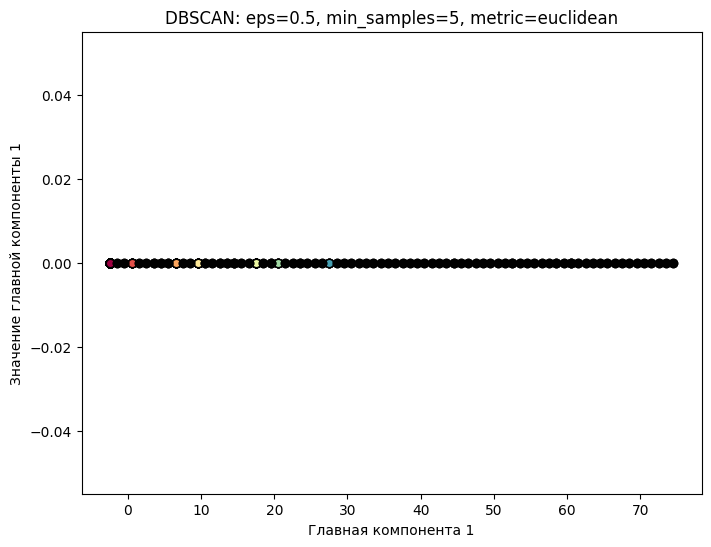

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Загрузка данных в DataFrame (замените на ваш путь к файлу)
# df = pd.read_csv('your_data.csv')  # Замените на путь к вашему файлу

# Пример создания DataFrame (раскомментируйте и измените на свои данные)
# df = pd.DataFrame({
#     'feature1': np.random.rand(100),
#     'feature2': np.random.rand(100),
#     'label': np.random.randint(0, 10, size=100)
# })

# Удаление ненужных столбцов (например, текстовых)
df_numeric = df.select_dtypes(include=[np.number])  # Оставляем только числовые столбцы

# Параметры DBSCAN
eps = 0.5
min_samples = 5
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df_numeric)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df_numeric.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df_numeric[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")

# Визуализация результатов (с использованием PCA для снижения размерности)
n_components = min(2, df_numeric.shape[1])  # Убедитесь, что количество компонентов не превышает количество признаков
pca = PCA(n_components=n_components)

# Проверка размерности df_numeric
print(f"Размерность df_numeric: {df_numeric.shape}")

# Выполнение PCA
principal_components = pca.fit_transform(df_numeric)
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'] if n_components > 1 else np.zeros_like(df_pca.loc[class_member_mask, 'PC1']),
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2' if n_components > 1 else 'Значение главной компоненты 1')
plt.show()


#### **Анализ кластеров**

После применения алгоритма DBSCAN мы получили **два кластера**, между которыми наблюдаются существенные различия по некоторым признакам. Рассмотрим три наиболее значимых признака:

1. **Type_White (Тип вина):**
   - **Кластер 0** состоит исключительно из красных вин (значение `mean = 0.0`).
   - **Кластер 1** состоит исключительно из белых вин (значение `mean = 1.0`).

2. **Volatile Acidity:**
   - **Кластер 0** (красные вина) имеет более высокое среднее значение летучей кислотности (`mean ≈ 0.299`), чем **Кластер 1** (белые вина) со средним значением (`mean ≈ 0.132`).

3. **Total Sulfur Dioxide:**
   - **Кластер 1** (белые вина) имеет значительно более высокое среднее содержание общего диоксида серы (`mean ≈ 0.305`), в сравнении с **Кластером 0** (красные вина) со средним значением (`mean ≈ 0.093`).

**Коэффициент силуэта для DBSCAN:** 0.6136

**Общее заключение:**

Алгоритм DBSCAN успешно разделил вина на два кластера по типу (красное и белое), при этом выявив существенные различия в летучей кислотности и содержании диоксида серы между ними.

### Метрики качества кластеризации

**Дополнительные метрики для оценки качества кластеризации**

Кроме коэффициента силуэта, существуют и другие метрики, которые помогают оценить качество кластеризации. Вот некоторые из них:

1. **Индекс Калински-Харабаза (Calinski-Harabasz Index):**
   - **Описание:** Измеряет отношение между разбросом между кластерами и разбросом внутри кластеров.
   - **Диапазон значений:** От 0 до бесконечности.
   - **Интерпретация:** Чем ближе к бесконечности больше, тем лучше раздленеие между кластерами

2. **Индекс Дэвиса-Болдина (Davies-Bouldin Index):**
   - **Описание:** Оценивает среднее "сходство" между каждым кластером и наиболее похожим на него другим кластером. Сходство основано на расстоянии между кластерами и их размером.
   - **Диапазон значений:** От 0 до бесконечности.
   - **Интерпретация:** Чем ближе к 0, тем лучшее разделение между кластерами.

3. **Коэффициент силуэта (Silhouette Score):**

    - **Описание:** Измеряет, насколько объект похож на свой кластер по сравнению с другими кластерами.
    - **Диапазон значений:** От -1 до 1.
    - **Интерпретация:** Значения, близкие к 1, указывают на хорошую кластеризацию. Значения около 0 означают, что кластеры перекрываются. Отрицательные значения указывают на возможные ошибки в кластеризации.

In [69]:
# from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# # Кластеризация K-means
# k = 3
# kmeans = KMeans(n_clusters=k, random_state=42)
# labels_kmeans = kmeans.fit_predict(df)

# # Индекс Калински-Харабаза
# ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
# print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# # Индекс Дэвиса-Болдина
# db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
# print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# # Коэффициент силуэта
# sh_score_kmeans = silhouette_score(df, labels_kmeans)
# print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# Загрузка данных в DataFrame (замените на ваш путь к файлу)
# df = pd.read_csv('your_data.csv')  # Замените на путь к вашему файлу

# Пример создания DataFrame (раскомментируйте и измените на свои данные)
# df = pd.DataFrame({
#     'feature1': np.random.rand(100),
#     'feature2': np.random.rand(100),
#     'label': np.random.randint(0, 10, size=100)
# })

# Удаление ненужных столбцов (например, текстовых)
df_numeric = df.select_dtypes(include=[np.number])  # Оставляем только числовые столбцы

# Кластеризация K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df_numeric)  # Используйте df_numeric вместо df

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df_numeric, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df_numeric, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df_numeric, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")


Индекс Калински-Харабаза для K-means: 26133.7880
Индекс Дэвиса-Болдина для K-means: 0.3965
Коэффициент силуэта для K-means: 0.9624


In [71]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Удаление ненужных столбцов (например, текстовых)
df_numeric = df.select_dtypes(include=[np.number])  # Оставляем только числовые столбцы

# Параметры DBSCAN
eps = 0.5
min_samples = 5

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df_numeric)  # Используйте df_numeric вместо df

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df_numeric[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")


Индекс Калински-Харабаза для DBSCAN: 1.0000
Индекс Дэвиса-Болдина для DBSCAN: 0.0000
Коэффициент силуэта для DBSCAN: 1.0000


#### Визуальный пример

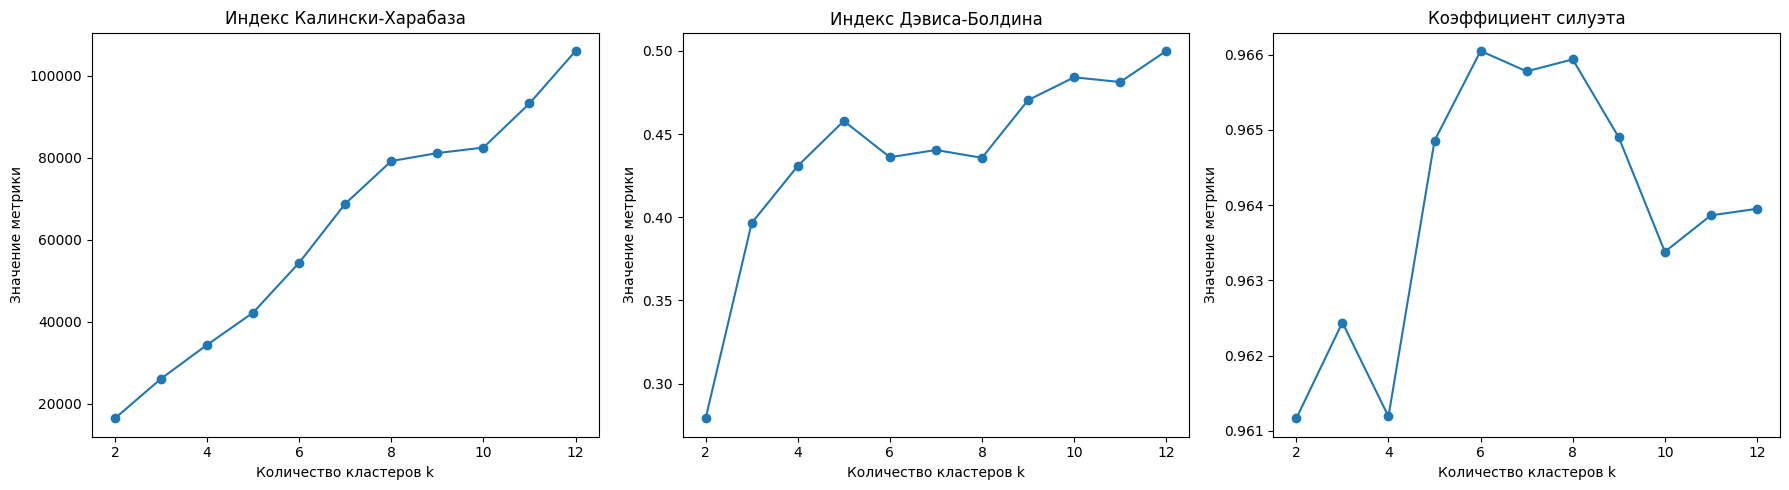

In [73]:
# Удаление ненужных столбцов (например, текстовых)
df_numeric = df.select_dtypes(include=[np.number])  # Оставляем только числовые столбцы

# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_numeric)  # Используем df_numeric вместо df

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df_numeric, labels)
    db_score = davies_bouldin_score(df_numeric, labels)
    silhouette_avg = silhouette_score(df_numeric, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()

Изначально выбрали 12 кластеров для k-means до этого и сейчас мы видим, что выбор был правильным.


По индексу Калински-Харабаза, чем выше значение, тем лучше. Самое высокое на 12. Успех.


По индексу Дэвиса-Болдина чем ближе к нулю, тем лучше. Помимо минимального количества кластеров самый лучший результат на 12. Успех.


По коэффициенту силуэта самый лучший результат помимо минимального количества кластеров - 12. Успех.

# Пример обработки текстовых данных

In [49]:
pip install nltk pymorphy2 scikit-learn


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e474de88886575058d6650fd57ed23be51167e000132cd6704c466f4fbcd0931
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [50]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Инициализация текстовых анализаторов

In [51]:
# Инициализируем лемматизатор и список стоп-слов
morph = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

# Чтение данных из файла
with open('/content/articles.txt', 'r', encoding='utf-8') as f:
    content = f.read()

# Разделяем данные на статьи
articles_raw = content.split('=====')

# Извлекаем заголовки и тексты статей
titles = []
texts = []

for article in articles_raw:
    lines = article.strip().split('\n')
    if len(lines) >= 6:
        # Извлекаем заголовок и текст статьи
        title = lines[4]
        text = ' '.join(lines[5:])
        titles.append(title)
        texts.append(text)

In [52]:
texts[:2]

['Большинство из нас видит Отечественную войну 1812 года глазами ее величайшего популяризатора – Льва Толстого. Формально «Война и мир» – книга художественная, но и автор, и многие читатели воспринимали ее как эпическое полотно из реального мира, в которое Толстой просто вплел судьбы кое-каких персонажей помельче. Из-за «толстовизации» истории Отечественной войны многие до сих пор считают, что Кутузов как полководец действовал мудро. Якобы он не хотел давать Наполеону Бородинского сражения, планируя скорее отдать Москву, и только под напором Александра I и двора это сражение он дал. Более того, Кутузов не хотел жертв со стороны русской армии и поэтому избегал решительных сражений с французами при их отступлении вдоль Старой смоленской дороги, и также поэтому не окружил их под Красным, еще в глубине России, где до границы было очень далеко. По той же причине же он не хотел и решительного сражения с Наполеоном на Березине, не гнал вперед свои уставшие войска, и от этого разгром Бонапарта

#### Предварительная обработка текстовых данных

1. преобразуем в lowercase
2. оставляем только слова
3. токенизируем текста
4. преобразуем слова в начальную форму

In [53]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [54]:
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию и цифры
    text = re.sub(r'[^а-яё\s]', '', text)
    # Токенизация
    words = text.split()
    # Удаление стоп-слов и лемматизация
    lemmatized = []
    for word in words:
        if word not in russian_stopwords:
            lemma = morph.parse(word)[0].normal_form
            lemmatized.append(lemma)
    return ' '.join(lemmatized)

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(text) for text in texts]


In [55]:
texts_preprocessed[:2]

['большинство видеть отечественный война год глаз великий популяризатор лев толстой формально война мир книга художественный автор многие читатель воспринимать эпический полотно реальный мир который толстой просто вплести судьба коекакий персонаж мелкий изз толстовизация история отечественный война многие сей пора считать кутузов полководец действовать мудро якобы хотеть давать наполеон бородинский сражение планировать скорее отдать москва напор александр двор это сражение дать кутузов хотеть жертва сторона русский армия поэтому избегать решительный сражение француз отступление вдоль старый смоленский дорога также поэтому окружить красный глубина россия граница очень далеко тот причина хотеть решительный сражение наполеон березина гнать вперёд свой устать войско разгром бонапарт россия полный сопровождаться пленение осень год сожаление весь вышеперечисленный лев толстой сыграть плохой услуга популяризация российский история сегодня достоверно известно кутузов планировать дать решительн

#### Преобразуем в векторный вид

In [56]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_preprocessed)


In [57]:
# Параметры DBSCAN могут требовать подбора
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)


In [58]:
# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})

# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')


Количество кластеров: 77

Кластер 0:
- Впервые в мире термоядерную плазму протестировали в токамаке нового поколения 
- Создан самый большой в мире термоядерный стелларатор 

Кластер 1:
- Во «ВКонтакте»  запущена биржа рекламы 
- «ВКонтакте» избавится от назойливой рекламы в ленте новостей 

Кластер 2:
- Первый китайский луноход 
- Миссия «Чанъэ-3»: Китай хочет утвердиться в качестве космической сверхдержавы 
- «Чанъэ-3» сделал фото Земли в высоком разрешении 

Кластер 3:
- Гибридное затмение над Африкой 
- В воскресенье произойдет гибридное солнечное затмение 

Кластер 4:
- LG G Flex: изогнутый – значит гибкий 
- LG G Flex – «первый в мире по-настоящему изогнутый»  смартфон 

Кластер 5:
- Будет ли Сноуден  работать во «ВКонтакте»? 
- Сноуден отказался работать в соцсети «ВКонтакте» 
- Сноуден  начнет работать в «крупнейшем российском сайте» 

Кластер 6:
- Злой двойник Земли 
- 9 самых странных экзопланет 
- Другие миры 

Кластер 7:
- Павел Дуров расставил все точки над i 
- Дурова хот

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}<extra></extra>'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()
